<a href="https://colab.research.google.com/github/chingyaousf/Intern-project-2023/blob/main/scripts/MLpredictionDep_05_Model_KNN_SF3B1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DeepDEP/filtered_arranged_table.csv")
data

,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,ZYG11A (440590) Exp,ZYG11B (79699) Exp,ZYX (7791) Exp,ZZEF1 (23140) Exp,ZZZ3 (26009) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,3.116032,0.056584,0.226509,0.111031,0.000000,1.035624,0.176323,5.700440,4.144046,...,3.282440,2.797013,6.821455,3.010780,4.381975,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,4.178715,0.000000,0.214125,0.344828,0.070389,0.097611,0.000000,6.336819,3.231125,...,0.014355,2.032101,7.002252,3.444932,4.910733,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,4.003602,0.014355,0.137504,0.014355,0.000000,0.028569,0.000000,6.337176,3.781360,...,0.014355,2.761285,6.826421,3.524816,5.592457,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.137504,1.405992,0.201634,0.000000,0.000000,0.014355,0.000000,5.431289,4.300856,...,0.014355,1.989139,6.332708,3.673556,3.469886,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,1.464668,3.586164,0.250962,0.000000,0.042644,4.525443,0.000000,5.674122,4.510962,...,1.356144,2.956057,7.853185,3.442280,3.351911,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,1.967169,0.000000,2.198494,0.000000,0.000000,1.490570,0.000000,5.300490,4.314697,...,0.014355,4.173127,6.560256,2.969012,5.276869,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,3.847997,0.000000,5.899901,0.321928,0.000000,3.206331,0.000000,5.831877,3.822730,...,0.622930,3.084064,6.596935,3.177918,4.847997,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,1.819668,0.014355,0.014355,0.201634,0.000000,2.912650,0.028569,5.646451,4.547820,...,1.400538,2.568032,6.953498,3.087463,4.226509,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,2.990955,0.000000,7.608440,0.014355,0.000000,0.584963,0.000000,5.104337,4.228819,...,1.480265,2.748461,7.432041,2.903038,4.660495,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/SF3B1_gt_00.csv")
data

,DepMap_ID,A1BG (1) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AACS (65985) Exp,AADAC (13) Exp,AADACL2 (344752) Exp,AADACL3 (126767) Exp,...,ZXDB (158586) Exp,ZXDC (79364) Exp,ZYG11A (440590) Exp,ZYX (7791) Exp,ZZEF1 (23140) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,3.116032,0.111031,0.000000,1.035624,0.176323,4.144046,0.790772,0.014355,0.000000,...,1.914565,4.700994,3.282440,6.821455,3.010780,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,4.178715,0.344828,0.070389,0.097611,0.000000,3.231125,0.000000,0.000000,0.000000,...,1.622930,3.619413,0.014355,7.002252,3.444932,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,4.003602,0.014355,0.000000,0.028569,0.000000,3.781360,0.000000,0.000000,0.000000,...,1.773996,3.763412,0.014355,6.826421,3.524816,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.137504,0.000000,0.000000,0.014355,0.000000,4.300856,3.547203,0.014355,0.000000,...,1.761285,3.872829,0.014355,6.332708,3.673556,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,1.464668,0.000000,0.042644,4.525443,0.000000,4.510962,1.985500,0.000000,0.014355,...,2.176323,3.773996,1.356144,7.853185,3.442280,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,1.967169,0.000000,0.000000,1.490570,0.000000,4.314697,0.042644,0.000000,0.000000,...,2.817623,2.918386,0.014355,6.560256,2.969012,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,3.847997,0.321928,0.000000,3.206331,0.000000,3.822730,1.443607,0.000000,0.000000,...,2.634593,2.639232,0.622930,6.596935,3.177918,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,1.819668,0.201634,0.000000,2.912650,0.028569,4.547820,0.000000,0.000000,0.000000,...,3.224966,2.904966,1.400538,6.953498,3.087463,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,2.990955,0.014355,0.000000,0.584963,0.000000,4.228819,0.000000,0.000000,0.000000,...,1.867896,2.845992,1.480265,7.432041,2.903038,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/SF3B1_gt_01.csv")
data

,DepMap_ID,AARD (441376) Exp,ABCC12 (94160) Exp,ABCD1 (215) Exp,ABHD11 (83451) Exp,ACAN (176) Exp,ACOT6 (641372) Exp,ADAM15 (8751) Exp,ADAMTSL3 (57188) Exp,ADCY6 (112) Exp,...,ZER1 (10444) Exp,ZFP57 (346171) Exp,ZFPL1 (7542) Exp,ZFYVE21 (79038) Exp,ZNF135 (7694) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,3.000000,0.000000,2.739848,4.845992,0.070389,0.137504,5.979568,3.056584,4.684258,...,4.737687,0.028569,5.428946,5.863443,1.042644,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,0.056584,0.000000,3.979111,3.792855,0.176323,0.000000,5.264161,0.389567,4.757557,...,3.130931,0.042644,5.020591,4.590362,0.028569,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,0.000000,0.000000,3.190615,3.084064,0.028569,0.000000,4.851999,0.097611,4.564988,...,2.592158,0.214125,4.512227,5.188243,0.000000,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.000000,0.070389,1.835924,7.139654,0.000000,0.000000,6.923981,0.000000,5.074249,...,3.645010,0.000000,4.877253,4.817112,0.000000,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,0.000000,0.000000,1.157044,5.077670,0.000000,0.000000,5.110196,0.000000,5.608809,...,3.587365,0.000000,5.172327,5.484138,0.014355,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,2.983678,0.000000,3.243364,3.403268,1.871844,0.000000,5.584963,0.263034,4.701549,...,3.884598,0.757023,4.305241,4.590362,2.548437,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,0.250962,0.042644,2.724650,3.078951,1.117695,0.000000,4.714795,1.084064,4.078951,...,4.528571,0.014355,5.647315,4.786596,0.565597,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,1.992768,0.084064,2.994580,2.339137,0.807355,0.000000,4.797532,0.443607,3.568032,...,3.679199,0.000000,4.498251,4.551516,1.443607,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,1.090853,0.028569,3.277985,3.292782,0.070389,0.000000,6.260590,0.613532,3.841973,...,3.261531,0.321928,5.194560,4.964861,1.871844,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/SF3B1_ng_01.csv")
data

,DepMap_ID,ABCE1 (6059) Exp,ABRAXAS1 (84142) Exp,ACADM (34) Exp,ADH5 (128) Exp,AFMID (125061) Exp,ALKBH8 (91801) Exp,ANAPC10 (10393) Exp,ANP32A (8125) Exp,ARL6IP6 (151188) Exp,...,ZNF277 (11179) Exp,ZNF280C (55609) Exp,ZNF330 (27309) Exp,ZNF438 (220929) Exp,ZUP1 (221302) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,6.037163,2.144046,4.662205,7.535509,5.789729,2.134221,4.008989,8.396648,4.283181,...,3.270529,2.691534,5.313971,1.269033,3.928844,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,5.823495,3.258519,6.898934,5.987776,6.343585,3.007196,4.241840,8.505296,5.336997,...,3.462052,1.761285,5.449231,1.263034,3.536053,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,6.767125,3.963474,7.203788,6.392661,6.669310,3.190615,4.863443,9.292138,5.794676,...,3.584963,2.372952,5.778734,1.655352,4.253989,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,5.558880,2.211012,5.280585,5.624101,4.932156,2.414136,3.751678,7.420887,3.270529,...,4.086614,1.790772,5.218006,1.859970,3.353323,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,6.666331,3.354734,4.773469,6.671010,5.368768,3.772941,4.831877,7.454011,4.958379,...,3.881665,1.713696,5.130107,0.584963,3.817623,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,6.394034,2.370164,6.077457,7.456806,6.199476,1.565597,4.733897,8.283227,4.746313,...,4.634593,2.114367,5.055716,3.203201,2.173127,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,5.635464,3.604071,5.863938,6.737416,4.771357,2.970854,4.767655,6.929554,3.484138,...,5.283922,1.823749,5.185470,1.914565,3.653060,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,7.266880,3.198494,4.965784,7.245933,4.128458,3.109361,5.583158,7.210525,4.495056,...,3.929791,1.937344,6.481396,1.664483,3.114367,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,5.988230,2.448901,6.068456,7.402415,3.882643,3.577731,4.466627,6.524503,4.792855,...,3.854993,1.659925,5.508746,1.405992,3.347666,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
from numpy import true_divide
# Cleaning Column Names
clean_column_names = {}
for column in data.columns:
    clean_column_names[column] = column.strip().replace(' ', '_').replace('(', '').replace(')', '')

data.rename(columns=clean_column_names, inplace=True)
data

,DepMap_ID,ABCE1_6059_Exp,ABRAXAS1_84142_Exp,ACADM_34_Exp,ADH5_128_Exp,AFMID_125061_Exp,ALKBH8_91801_Exp,ANAPC10_10393_Exp,ANP32A_8125_Exp,ARL6IP6_151188_Exp,...,ZNF277_11179_Exp,ZNF280C_55609_Exp,ZNF330_27309_Exp,ZNF438_220929_Exp,ZUP1_221302_Exp,EIF2AK3_9451_Dep,MYC_4609_Dep,NQO1_1728_Dep,SF3B1_23451_Dep,SQSTM1_8878_Dep
0,ACH-000001,6.037163,2.144046,4.662205,7.535509,5.789729,2.134221,4.008989,8.396648,4.283181,...,3.270529,2.691534,5.313971,1.269033,3.928844,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,5.823495,3.258519,6.898934,5.987776,6.343585,3.007196,4.241840,8.505296,5.336997,...,3.462052,1.761285,5.449231,1.263034,3.536053,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,6.767125,3.963474,7.203788,6.392661,6.669310,3.190615,4.863443,9.292138,5.794676,...,3.584963,2.372952,5.778734,1.655352,4.253989,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,5.558880,2.211012,5.280585,5.624101,4.932156,2.414136,3.751678,7.420887,3.270529,...,4.086614,1.790772,5.218006,1.859970,3.353323,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,6.666331,3.354734,4.773469,6.671010,5.368768,3.772941,4.831877,7.454011,4.958379,...,3.881665,1.713696,5.130107,0.584963,3.817623,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,6.394034,2.370164,6.077457,7.456806,6.199476,1.565597,4.733897,8.283227,4.746313,...,4.634593,2.114367,5.055716,3.203201,2.173127,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,5.635464,3.604071,5.863938,6.737416,4.771357,2.970854,4.767655,6.929554,3.484138,...,5.283922,1.823749,5.185470,1.914565,3.653060,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,7.266880,3.198494,4.965784,7.245933,4.128458,3.109361,5.583158,7.210525,4.495056,...,3.929791,1.937344,6.481396,1.664483,3.114367,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,5.988230,2.448901,6.068456,7.402415,3.882643,3.577731,4.466627,6.524503,4.792855,...,3.854993,1.659925,5.508746,1.405992,3.347666,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Exclude 'DepMap_ID' column
data_without_id = data.drop(columns=['DepMap_ID'])

# Extracting Features and Targets
features = data_without_id.drop(columns=[col for col in data_without_id.columns if 'Dep' in col])
# targets = data_without_id[[col for col in data_without_id.columns if 'Dep' in col]]
targets = data_without_id[["SF3B1_23451_Dep"]]

targets

,SF3B1_23451_Dep
0,1.000000
1,1.000000
2,0.994004
3,0.999886
4,0.973598
...,...
1000,1.000000
1001,1.000000
1002,0.998623
1003,0.999903


In [ ]:
# Splitting the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train the KNN regressor
knn = KNeighborsRegressor(n_neighbors=40)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=40)

In [ ]:
# Make predictions
y_pred = knn.predict(X_test_scaled)


In [ ]:
# Printing Predicted Values
print('Predicted Values:', y_pred)


Predicted Values: [[0.98930988]
 [0.99053707]
 [0.99264166]
 [0.99747386]
 [0.99072057]
 [0.98848578]
 [0.98253352]
 [0.99222128]
 [0.99205112]
 [0.99016295]
 [0.99122464]
 [0.9917318 ]
 [0.99467877]
 [0.99107582]
 [0.98932526]
 [0.99138069]
 [0.98497493]
 [0.99501078]
 [0.98545063]
 [0.98836277]
 [0.98400712]
 [0.99083498]
 [0.98653307]
 [0.9902379 ]
 [0.99747285]
 [0.99080965]
 [0.98996858]
 [0.99501667]
 [0.99025482]
 [0.9930775 ]
 [0.98769093]
 [0.99377511]
 [0.993673  ]
 [0.98796764]
 [0.98804534]
 [0.98562801]
 [0.98938105]
 [0.98848211]
 [0.98860409]
 [0.98080714]
 [0.9903669 ]
 [0.9917681 ]
 [0.98783256]
 [0.99424281]
 [0.99279954]
 [0.98797524]
 [0.98847557]
 [0.99724055]
 [0.99503146]
 [0.98793608]
 [0.97835727]
 [0.99503478]
 [0.99324121]
 [0.99360087]
 [0.98374859]
 [0.98726274]
 [0.99048467]
 [0.97728762]
 [0.99670833]
 [0.9873372 ]
 [0.99146563]
 [0.99017702]
 [0.99325968]
 [0.98586789]
 [0.98857358]
 [0.99561571]
 [0.98565119]
 [0.98641952]
 [0.99320206]
 [0.9917548 ]
 [

In [ ]:
# Evaluating the Model
# Mean Squared Error. It is a common metric used to measure the average squared difference between the predicted and actual values in regression tasks.
# Lower values of MSE indicate better model performance, as it means the predicted values are closer to the actual values. However, MSE is sensitive to outliers since the squared differences magnify their impact on the overall error.

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.0007969162788196762


In [ ]:
# Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. It gives a straightforward measure of the average prediction error. Lower MAE values indicate better accuracy.

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 0.014065250988755777


In [ ]:
# Calculate R-squared (coefficient of determination)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Coefficient of Determination (R-squared): 0.005461575401514374


In [ ]:
# SF3B1_filtered_arranged_table.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Mean Squared Error: 0.0008150735267035995
Mean Absolute Error: 0.01399615764891509
Coefficient of Determination (R-squared): -0.01719837167883309


In [ ]:
# SF3B1_gt_00.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.0008103603560609041
Mean Absolute Error: 0.014184216172563217
Coefficient of Determination (R-squared): -0.01131641214251533


In [ ]:
# SF3B1_gt_01.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.0007889843637793703
Mean Absolute Error: 0.014541351693411256
Coefficient of Determination (R-squared): 0.015360475070020141


In [ ]:
# SF3B1_ng_01.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.007223681897321987
Mean Absolute Error: 0.06281294721529751
Coefficient of Determination (R-squared): 0.029327147062368386


In [ ]:
# SF3B1_filtered_arranged_table.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SF3B1_23451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_SF3B1_filtered_arranged_table.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_SF3B1_23451_Dep,SF3B1_23451_Dep
926,ACH-001858,0.176323,0.056584,0.097611,0.014355,0.000000,3.035624,0.056584,5.299758,4.263034,...,0.992768,2.451541,2.889474,0.815575,2.976364,7.199967,3.465974,4.780310,0.991751,0.965198
630,ACH-000962,4.410748,0.028569,0.056584,0.000000,0.028569,1.189034,0.014355,5.620000,4.238023,...,1.599318,2.538538,3.364572,2.307429,2.980025,6.212569,3.214125,3.919340,0.986365,0.999715
682,ACH-001164,4.262283,0.000000,5.371210,0.000000,0.000000,1.765535,0.000000,5.003152,3.489286,...,0.495695,1.244887,2.711495,0.333424,2.495695,4.735522,2.107688,3.363171,0.988320,0.989402
514,ACH-000799,4.440288,0.014355,6.867773,0.014355,0.163499,0.641546,0.124328,5.484460,4.268285,...,0.807355,1.475085,4.251719,0.475085,2.077243,7.966477,4.179511,3.481557,0.992945,1.000000
365,ACH-000571,5.489928,0.000000,0.678072,0.000000,0.042644,3.016140,0.214125,5.319040,4.609400,...,0.516015,1.918386,3.526069,0.000000,3.114367,6.934281,4.079805,4.527946,0.993738,0.999373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.111031,0.014355,0.028569,0.000000,0.000000,1.378512,0.028569,5.497612,3.605257,...,0.505891,1.769772,3.135863,2.319040,2.367371,7.258236,2.841973,4.584361,0.991309,0.977665
778,ACH-001454,0.400538,0.000000,0.189034,0.163499,0.000000,4.678072,0.000000,4.751678,4.521051,...,1.104337,1.847997,2.754888,1.220330,2.459432,5.038261,2.782409,2.657640,0.992549,1.000000
334,ACH-000522,4.157044,0.000000,0.214125,0.000000,0.000000,2.893362,0.014355,6.321026,3.298658,...,0.823749,1.879706,3.442280,2.761285,3.238787,7.097295,4.590362,4.649041,0.990331,0.994450
210,ACH-000343,4.189034,0.042644,0.014355,0.367371,0.000000,2.304511,0.097611,5.744699,4.082362,...,5.763943,5.212180,3.607626,3.411426,3.869871,3.674687,2.611172,4.669027,0.988241,0.999641


In [ ]:
# SF3B1_gt_00.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SF3B1_23451_Dep"   # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_SF3B1_gt_00.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AACS_65985_Exp,AADAC_13_Exp,AADACL2_344752_Exp,AADACL3_126767_Exp,...,ZSWIM7_125150_Exp,ZSWIM8_23053_Exp,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,Pred_SF3B1_23451_Dep,SF3B1_23451_Dep
926,ACH-001858,0.176323,0.014355,0.000000,3.035624,0.056584,4.263034,1.700440,0.0,0.0,...,4.551516,5.402586,0.992768,2.451541,2.889474,0.815575,7.199967,3.465974,0.991545,0.965198
630,ACH-000962,4.410748,0.000000,0.028569,1.189034,0.014355,4.238023,0.000000,0.0,0.0,...,5.738227,4.672991,1.599318,2.538538,3.364572,2.307429,6.212569,3.214125,0.984100,0.999715
682,ACH-001164,4.262283,0.000000,0.000000,1.765535,0.000000,3.489286,0.000000,0.0,0.0,...,4.008092,4.546586,0.495695,1.244887,2.711495,0.333424,4.735522,2.107688,0.989629,0.989402
514,ACH-000799,4.440288,0.014355,0.163499,0.641546,0.124328,4.268285,0.000000,0.0,0.0,...,5.516961,6.254178,0.807355,1.475085,4.251719,0.475085,7.966477,4.179511,0.990145,1.000000
365,ACH-000571,5.489928,0.000000,0.042644,3.016140,0.214125,4.609400,0.056584,0.0,0.0,...,5.093814,5.728465,0.516015,1.918386,3.526069,0.000000,6.934281,4.079805,0.991478,0.999373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.111031,0.000000,0.000000,1.378512,0.028569,3.605257,0.367371,0.0,0.0,...,3.039138,4.851499,0.505891,1.769772,3.135863,2.319040,7.258236,2.841973,0.989767,0.977665
778,ACH-001454,0.400538,0.163499,0.000000,4.678072,0.000000,4.521051,0.097611,0.0,0.0,...,4.847496,5.676098,1.104337,1.847997,2.754888,1.220330,5.038261,2.782409,0.991541,1.000000
334,ACH-000522,4.157044,0.000000,0.000000,2.893362,0.014355,3.298658,0.111031,0.0,0.0,...,4.357552,5.879706,0.823749,1.879706,3.442280,2.761285,7.097295,4.590362,0.991126,0.994450
210,ACH-000343,4.189034,0.367371,0.000000,2.304511,0.097611,4.082362,0.000000,0.0,0.0,...,3.911692,5.228819,5.763943,5.212180,3.607626,3.411426,3.674687,2.611172,0.987712,0.999641


In [ ]:
# SF3B1_gt_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SF3B1_23451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_SF3B1_gt_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,AARD_441376_Exp,ABCC12_94160_Exp,ABCD1_215_Exp,ABHD11_83451_Exp,ACAN_176_Exp,ACOT6_641372_Exp,ADAM15_8751_Exp,ADAMTSL3_57188_Exp,ADCY6_112_Exp,...,WWC3_55841_Exp,ZDHHC12_84885_Exp,ZDHHC24_254359_Exp,ZER1_10444_Exp,ZFP57_346171_Exp,ZFPL1_7542_Exp,ZFYVE21_79038_Exp,ZNF135_7694_Exp,Pred_SF3B1_23451_Dep,SF3B1_23451_Dep
926,ACH-001858,0.111031,0.000000,3.330558,4.130931,0.000000,0.000000,5.976134,0.432959,3.218781,...,0.097611,5.867402,3.134221,4.930737,0.014355,5.789208,4.377818,0.000000,0.989026,0.965198
630,ACH-000962,2.153805,0.000000,1.859970,5.905447,0.000000,0.070389,6.016363,0.321928,3.892391,...,3.258519,4.855491,3.266037,3.468583,0.000000,4.958379,5.069530,0.014355,0.990341,0.999715
682,ACH-001164,2.464668,1.150560,2.166715,3.177918,0.903038,0.163499,4.706531,0.344828,3.614710,...,2.250962,5.069101,2.070389,3.275007,0.070389,4.283922,4.039138,1.799087,0.988786,0.989402
514,ACH-000799,3.282440,0.070389,5.289834,5.675816,6.442612,0.070389,7.072106,0.097611,4.935931,...,3.909773,5.396091,3.116032,3.801159,0.097611,5.464668,3.797013,0.042644,0.989117,1.000000
365,ACH-000571,0.042644,0.000000,3.539779,4.920293,0.000000,0.000000,6.067811,0.000000,4.170726,...,2.757023,5.562548,3.812498,4.263786,0.111031,5.557961,4.128458,0.014355,0.990074,0.999373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.250962,0.028569,2.543496,4.791293,0.000000,0.000000,4.901108,0.765535,2.895303,...,2.931683,5.340562,2.485427,2.815575,0.042644,5.523876,6.002252,2.066950,0.987310,0.977665
778,ACH-001454,0.014355,0.014355,2.543496,6.427439,0.000000,0.356144,6.389739,0.014355,3.539779,...,3.503349,7.023699,2.901108,4.556429,0.000000,4.399171,6.460906,2.163499,0.987056,1.000000
334,ACH-000522,0.084064,0.000000,2.104337,4.926948,0.042644,0.000000,6.163297,0.028569,4.076388,...,3.605257,3.875780,3.314697,2.632268,0.014355,5.049631,4.896272,0.028569,0.987301,0.994450
210,ACH-000343,1.176323,0.014355,4.514122,4.519793,0.137504,0.176323,5.380937,0.275007,4.430954,...,3.157044,5.268285,3.347666,4.027685,0.014355,5.011227,5.419202,2.422233,0.987264,0.999641


In [ ]:
# SF3B1_ng_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "SF3B1_23451_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_SF3B1_ng_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,ABCE1_6059_Exp,ABRAXAS1_84142_Exp,ACADM_34_Exp,ADH5_128_Exp,AFMID_125061_Exp,ALKBH8_91801_Exp,ANAPC10_10393_Exp,ANP32A_8125_Exp,ARL6IP6_151188_Exp,...,ZNF22_7570_Exp,ZNF225_7768_Exp,ZNF227_7770_Exp,ZNF277_11179_Exp,ZNF280C_55609_Exp,ZNF330_27309_Exp,ZNF438_220929_Exp,ZUP1_221302_Exp,Pred_SF3B1_23451_Dep,SF3B1_23451_Dep
926,ACH-001858,6.094658,3.403268,5.283551,7.078631,5.013909,2.247928,4.970854,7.429114,4.308157,...,4.712045,1.327687,2.648465,4.289834,2.347666,5.190615,2.929791,3.207893,0.989310,0.965198
630,ACH-000962,4.961160,2.353323,5.911212,6.546586,4.231125,3.733354,3.646163,7.456149,5.312883,...,3.906891,1.650765,3.626439,4.350497,2.592158,5.165912,1.432959,3.757023,0.990537,0.999715
682,ACH-001164,4.650190,3.282440,4.372952,6.155021,5.271276,2.195348,3.889474,6.856114,4.594549,...,5.414474,1.257011,2.805292,3.866908,1.238787,4.213347,1.636915,2.277985,0.992642,0.989402
514,ACH-000799,4.765535,2.179511,5.009437,5.921246,4.634012,2.759156,3.903038,7.297008,4.571677,...,2.863938,1.521051,3.042644,3.789729,1.250962,4.456806,1.622930,2.784504,0.997474,1.000000
365,ACH-000571,5.640100,2.498251,5.615004,7.614710,4.713146,2.528571,4.107688,6.601102,4.292045,...,4.317594,1.748461,3.304511,3.357552,1.752749,4.720826,1.650765,2.803227,0.990721,0.999373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,6.081297,2.709291,5.239169,7.663273,4.988230,3.240314,4.490570,8.614084,4.954662,...,5.914086,1.411426,3.235727,3.661065,3.070389,5.304146,1.713696,3.261531,0.985201,0.977665
778,ACH-001454,4.272770,1.560715,3.229588,6.324991,5.086189,2.339137,4.842476,7.138221,5.322289,...,4.796494,1.416840,2.849999,4.777683,2.226509,4.531069,1.963474,3.611172,0.989760,1.000000
334,ACH-000522,6.783195,3.488001,6.340740,6.031660,4.691534,4.439623,4.898208,9.135196,5.393348,...,0.594549,1.761285,3.880686,4.872829,3.166715,5.364923,3.125982,4.055716,0.983479,0.994450
210,ACH-000343,5.889474,3.037382,5.391630,7.252003,6.185867,3.601697,3.970854,8.286003,5.437294,...,2.847997,2.111031,3.818646,4.907852,3.541019,4.626439,0.831877,3.694880,0.984463,0.999641


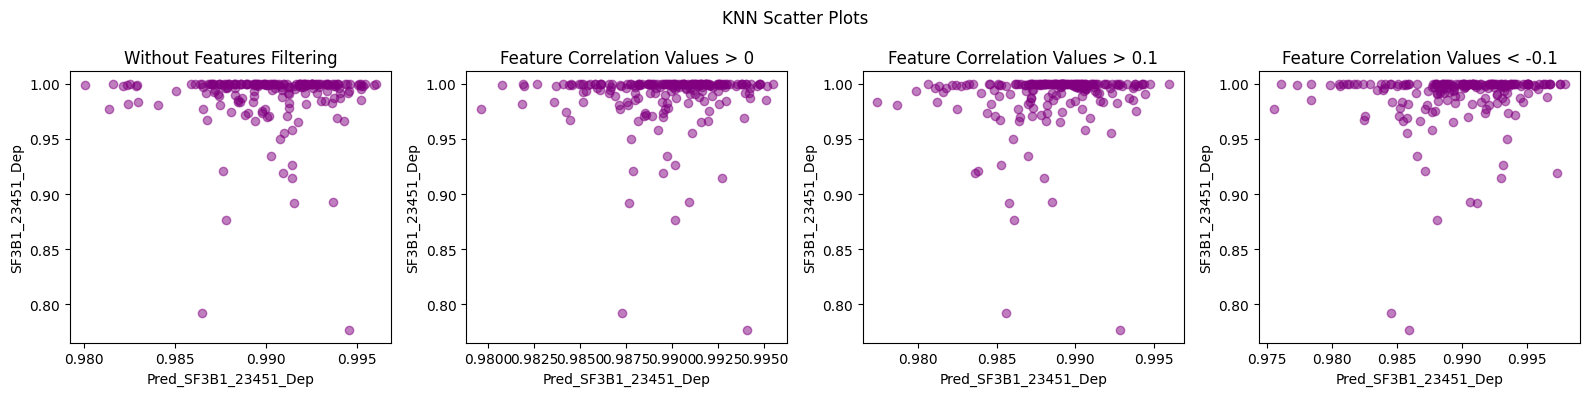

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_SF3B1_filtered_arranged_table.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_SF3B1_gt_00.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_SF3B1_gt_01.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/KNN_SF3B1_ng_01.csv'
]

dfs = []  # List to store the DataFrames

# Read each CSV file and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('KNN Scatter Plots')

# Create scatter plots
titles = ['Without Features Filtering', 'Feature Correlation Values > 0', 'Feature Correlation Values > 0.1',
          'Feature Correlation Values < -0.1']

for i, df in enumerate(dfs):
    ax = axs[i]  # Select the subplot
    ax.scatter(df['Pred_SF3B1_23451_Dep'], df['SF3B1_23451_Dep'],c='purple', alpha=0.5)
    ax.set_xlabel('Pred_SF3B1_23451_Dep')
    ax.set_ylabel('SF3B1_23451_Dep')
    ax.set_title(titles[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()
